In [20]:
import pandas as pd
df_ticket = pd.read_json('ticket-lang-subcategory-big.json')

In [21]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   queue        8388 non-null   object
 1   priority     8388 non-null   object
 2   language     8388 non-null   object
 3   subcategory  8388 non-null   object
 4   subject      8388 non-null   object
 5   text         8388 non-null   object
dtypes: object(6)
memory usage: 393.9+ KB


In [22]:
df_data = df_ticket[df_ticket['text'].notnull()]


In [23]:
df_data.head()

,queue,priority,language,subcategory,subject,text
0,HARDWARE,MEDIUM,EN,NUC,Issue with Intel NUC after software update,"Dear support team, I'm experiencing a minor is..."
1,HARDWARE,HIGH,FR,DVD-Player,Mon lecteur DVD ne s'allume pas!,"Bonjour, mon lecteur DVD-Player refuse de s'al..."
2,SOFTWARE,MEDIUM,ES,Compliance Risk Management,Actualización a la última versión - Bug en CRM...,"Hola equipo de soporte, últimamente he notado ..."
3,SOFTWARE,HIGH,EN,CyberLink PowerDirector 19,Urgent: CyberLink PowerDirector 19 won't launc...,"Dear support team,\nI've been using CyberLink ..."
4,SOFTWARE,HIGH,EN,Apple App Store Connect,Problem mit Apple App Store Connect - Sicherhe...,Dringend! Unsere App in Apple App Store Connec...


In [4]:
df_data.to_csv('fullset_tickets_clean', index=False)


In [5]:
df_full = pd.read_csv('fullset_tickets_clean.csv')

df_full.head()


,queue,priority,language,subcategory,subject,text
0,HARDWARE,MEDIUM,EN,NUC,Issue with Intel NUC after software update,"Dear support team, I'm experiencing a minor is..."
1,HARDWARE,HIGH,FR,DVD-Player,Mon lecteur DVD ne s'allume pas!,"Bonjour, mon lecteur DVD-Player refuse de s'al..."
2,SOFTWARE,MEDIUM,ES,Compliance Risk Management,Actualización a la última versión - Bug en CRM...,"Hola equipo de soporte, últimamente he notado ..."
3,SOFTWARE,HIGH,EN,CyberLink PowerDirector 19,Urgent: CyberLink PowerDirector 19 won't launc...,"Dear support team,\nI've been using CyberLink ..."
4,SOFTWARE,HIGH,EN,Apple App Store Connect,Problem mit Apple App Store Connect - Sicherhe...,Dringend! Unsere App in Apple App Store Connec...


In [7]:
df_full.describe()

,queue,priority,language,subcategory,subject,text
count,8388,8388,8388,8388,8388,8388
unique,3,3,4,1803,8071,8388
top,HARDWARE,MEDIUM,EN,Employee Inquiries::Accounting::Supplier Invoices,Solicitud de oferta para desarrollo de software,"Dear support team, I'm experiencing a minor is..."
freq,2835,3527,3673,85,22,1


In [24]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Load the preprocessed data

df_ticket = pd.read_csv('fullset_tickets_clean.csv')

# Ensure all entries in the text column are strings
df_ticket['text'] = df_ticket['text'].astype(str)

# Set up the sentiment analysis pipeline
pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Function to get sentiment
def get_sentiment(text):
    try:
        return pipe(text)[0]
    except Exception as e:
        return {"label": "ERROR", "score": 0.0, "error": str(e)}

# Apply sentiment analysis to the text column
df_ticket['sentiment'] = df_ticket['text'].apply(get_sentiment)

# Extract label and score from the sentiment analysis results
df_ticket['sentiment_label'] = df_ticket['sentiment'].apply(lambda x: x['label'])
df_ticket['sentiment_score'] = df_ticket['sentiment'].apply(lambda x: x['score'])

# Save the results to a new CSV file
df_ticket.to_csv('path_to_save_sentiment_analysis_results.csv', index=False)

# Display the first few rows of the DataFrame
df_ticket.sample()


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,queue,priority,language,subcategory,subject,text,sentiment,sentiment_label,sentiment_score
7300,SOFTWARE,MEDIUM,EN,Airtable,Update Request for Airtable Software,"Hi, I'm having issues with Airtable bugs. Plea...","{'label': 'negative', 'score': 0.8174875974655...",negative,0.817488


In [17]:
df_fullsent = pd.read_csv('fulldata_sentiment_analysis_results.csv')
df_fullsent.sample(20)

,queue,priority,language,subcategory,subject,text,sentiment,sentiment_label,sentiment_score
4092,SOFTWARE,MEDIUM,EN,Printer Driver,Issue noticed with Printer Driver update,"Dear Support Team, I recently noticed a bug wi...","{'label': 'negative', 'score': 0.8369090557098...",negative,0.836909
4695,SOFTWARE,LOW,EN,Carbon Management,Carbon Management - Change of Billing Company ...,"Dear Support Team, I noticed a small error on ...","{'label': 'negative', 'score': 0.5571450591087...",negative,0.557145
1029,HARDWARE,MEDIUM,FR,External Monitor,Problème avec mon moniteur externe - Intervent...,"Bonjour, j'utilise récemment un nouveau monite...","{'label': 'neutral', 'score': 0.7266258597373962}",neutral,0.726626
6730,HARDWARE,MEDIUM,ES,MSI MEG Z490 Godlike Motherboard,Problema con MSI MEG Z490,Mi MSI MEG Z490 Godlike se reinicia solo cuand...,"{'label': 'neutral', 'score': 0.6882287263870239}",neutral,0.688229
3560,ACCOUNTING,HIGH,EN,Customer Inquiries::Quote Requests,Urgent: Invoice Needed for Order C1243322,"Hello Support Team, I urgently require the inv...","{'label': 'neutral', 'score': 0.62173992395401}",neutral,0.621740
2892,SOFTWARE,LOW,EN,Blackboard,Feedback on Blackboard & Small Query,"Hi Support Team, I just wanted to say that Bla...","{'label': 'positive', 'score': 0.9201598763465...",positive,0.920160
3297,HARDWARE,MEDIUM,ES,Android Tablet,Problema con mi tablet Android,Mi tablet Android no enciende correctamente de...,"{'label': 'neutral', 'score': 0.7618318796157837}",neutral,0.761832
2741,HARDWARE,HIGH,DE,DualSense Wireless Controller,DualSense Controller nicht einschalten nach Up...,Nach Ihrem letzten Update lässt sich mein Dual...,"{'label': 'positive', 'score': 0.5229312777519...",positive,0.522931
990,SOFTWARE,HIGH,EN,Illustrator,Critical Issue with Adobe Illustrator - Unable...,"Hi Support, I am experiencing a major issue wi...","{'label': 'negative', 'score': 0.8545753955841...",negative,0.854575
3483,HARDWARE,MEDIUM,DE,DisplayPort Cable,DisplayPort Kabel – Bildqualität unscharf,"Hey Team, ich nutze eure DisplayPort Kabel, ab...","{'label': 'neutral', 'score': 0.7161156535148621}",neutral,0.716116


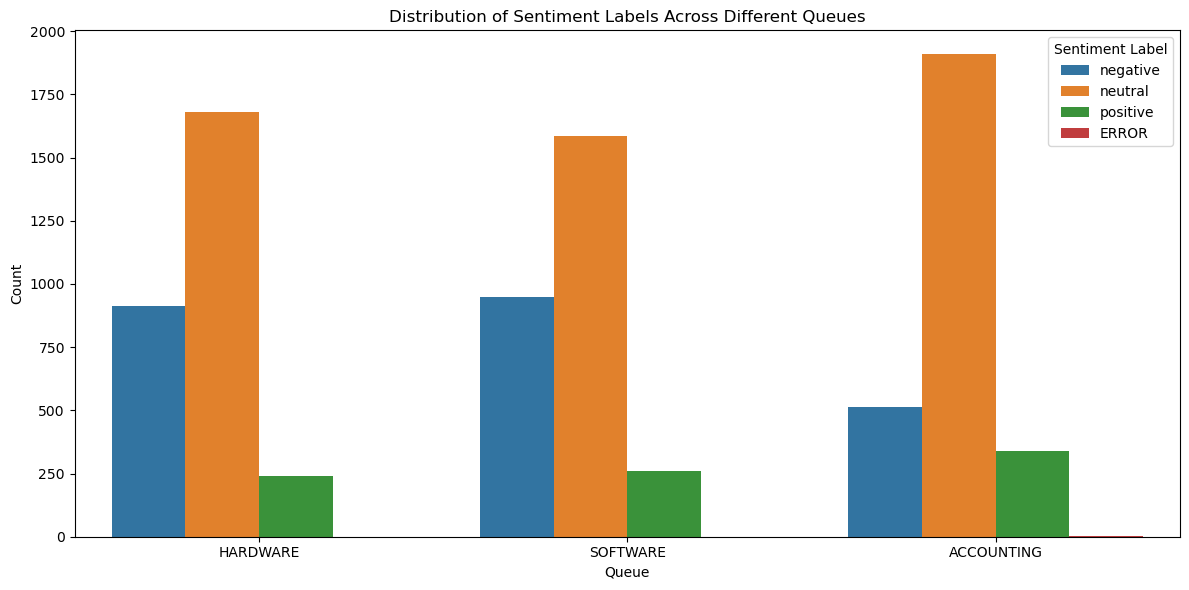

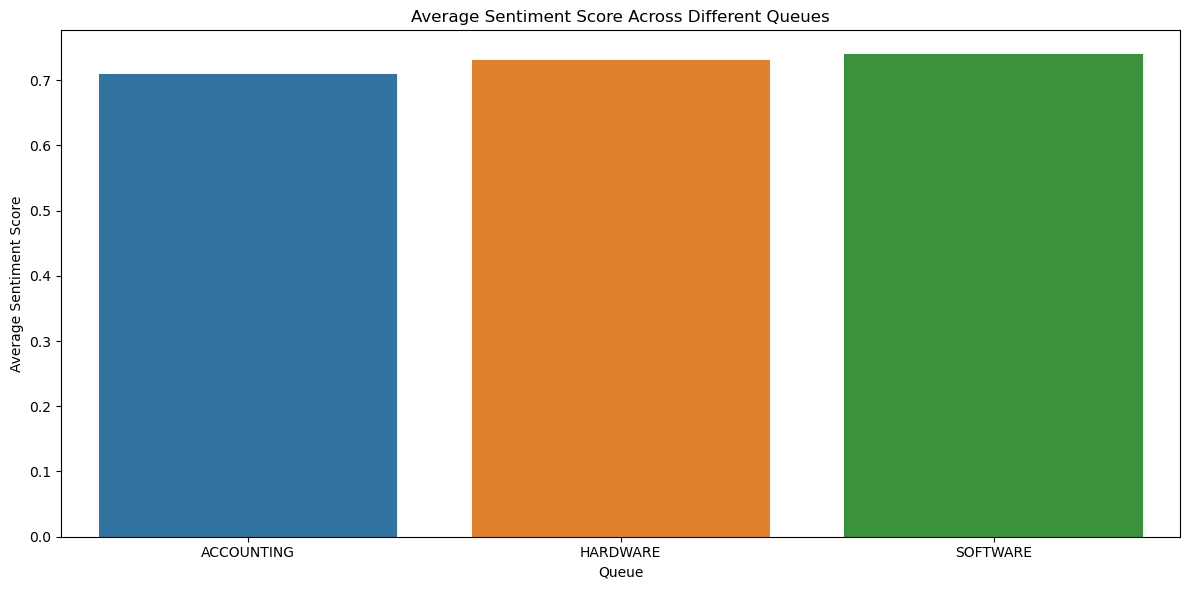

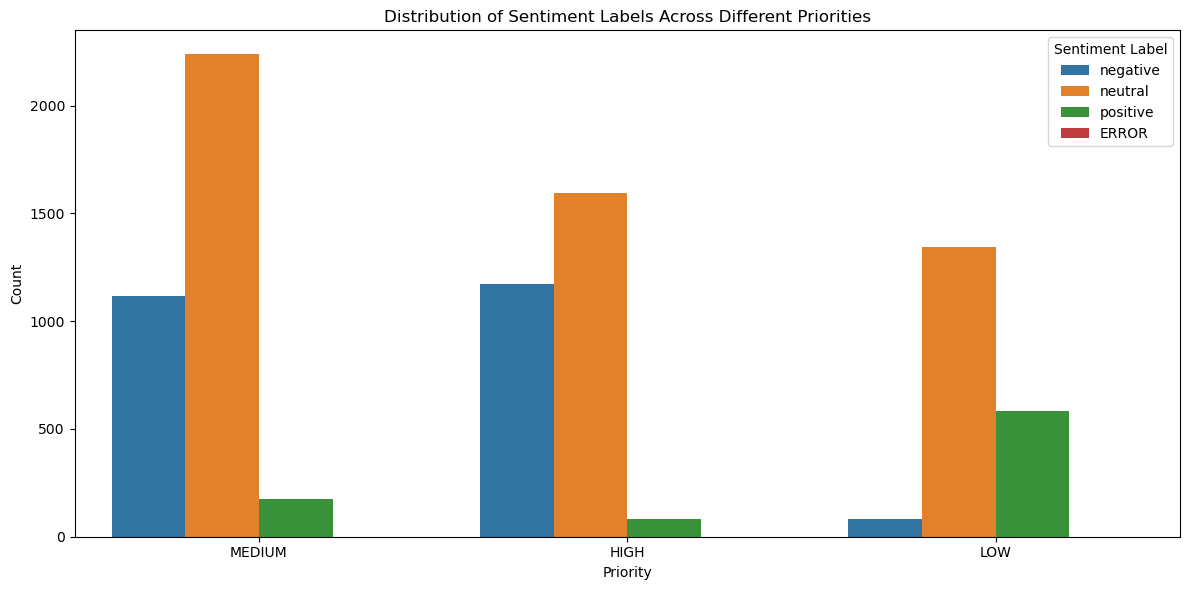

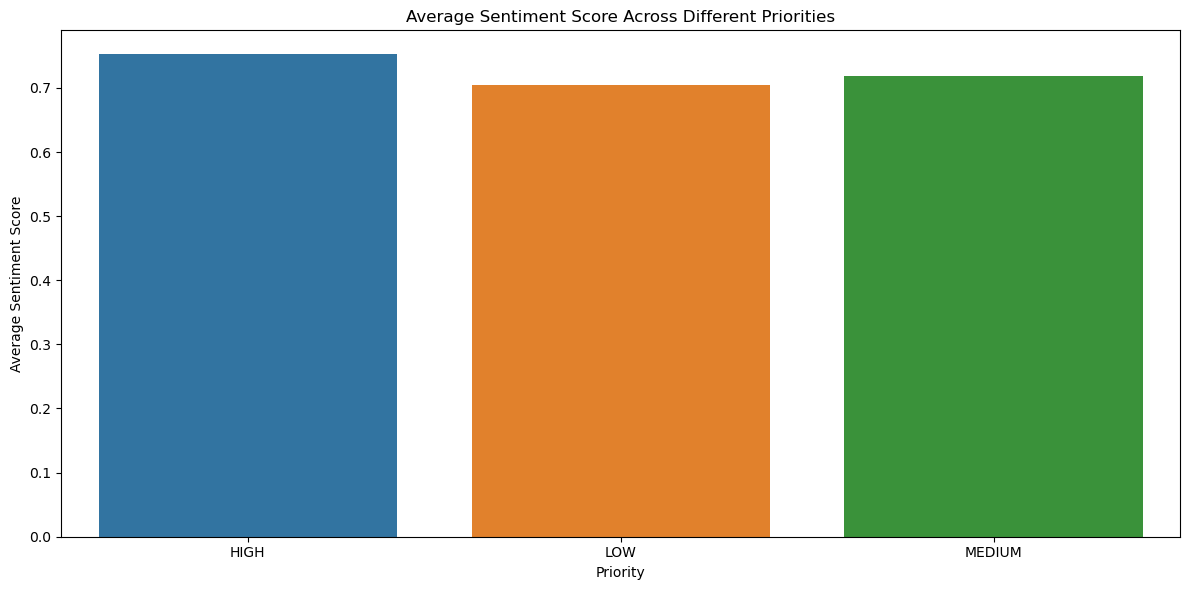

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for sentiment label distribution across queues
plt.figure(figsize=(12, 6))
sns.countplot(x='queue', hue='sentiment_label', data=df_fullsent)
plt.title('Distribution of Sentiment Labels Across Different Queues')
plt.xlabel('Queue')
plt.ylabel('Count')
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

# Calculate the average sentiment score for each queue
avg_sentiment_score_queue = df_fullsent.groupby('queue')['sentiment_score'].mean().reset_index()

# Plot the average sentiment score for each queue
plt.figure(figsize=(12, 6))
sns.barplot(x='queue', y='sentiment_score', data=avg_sentiment_score_queue)
plt.title('Average Sentiment Score Across Different Queues')
plt.xlabel('Queue')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()

# Set up the figure and axes for sentiment label distribution across priorities
plt.figure(figsize=(12, 6))
sns.countplot(x='priority', hue='sentiment_label', data=df_fullsent)
plt.title('Distribution of Sentiment Labels Across Different Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

# Calculate the average sentiment score for each priority
avg_sentiment_score_priority = df_fullsent.groupby('priority')['sentiment_score'].mean().reset_index()

# Plot the average sentiment score for each priority
plt.figure(figsize=(12, 6))
sns.barplot(x='priority', y='sentiment_score', data=avg_sentiment_score_priority)
plt.title('Average Sentiment Score Across Different Priorities')
plt.xlabel('Priority')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()
